# A Chinese Car making company  aspires to enter the Indian market by setting up their manufacturing unit there and producing cars locally to give competition to their Indian and other counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the Indian market, since those may be very different from the Chinese market.

The company wants to know:

a. Which variables are significant in predicting the price of a car.

b. How well those variables describe the price of a car.


Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Indian market

# Business Goal

We are required to model the price of cars with the given independent variables in the dataset. It will be used by the company to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy and rest to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. So let's go

In [61]:
# importing all the neccessary modules to do the analysis on the dataset.

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
warnings.filterwarnings('ignore')

%matplotlib inline

# loading the csv file to do below:

# Steps 1.:

    a. Loading the dataset using pandas library
    b. Reading the data to understand the structure.
    
 

In [63]:
carPrice = pd.read_csv('CarPrice_Assignment.csv')
carPrice.head()
carPrice.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [64]:
# now lets check the shape of the data to understand the number of variables and data
carPrice.shape

(205, 26)

# dataset has 205 columns and 26 rows

In [65]:
#Now checking the dataset for null values in the columns
carPrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [66]:
#Now checking the summary of the dataset to find out the statistics
carPrice.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [67]:
#understanding the data type of each column in the dataset
carPrice.dtypes.value_counts()

object     10
int64       8
float64     8
dtype: int64

## Step 2: Data Cleaning and EDA

a. Cleanup carname to consider only company name as the independent variable for model building.
b. Identify null values if any.
c. Replace neccessary values.
d. Convert dtypes if required.
e. Explore spread of variables and their effectiveness on price

In [68]:
# In the dataset company name inclues the model as well. We will remove the model and keep only the company name

carPrice['CarName']=carPrice['CarName'].apply(lambda x:x.split(' ', 1)[0])
carPrice.rename(columns = {'CarName':'companyname'}, inplace = True)
carPrice.head()

,car_ID,symboling,companyname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [69]:
# lets check the unique values in the company name column
carPrice['companyname'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Looking at the unique values we can tell that there are spelling mistakes in the company name which needs to be fixed 

like below:

    
maxda -> mazda

Nissan -> nissan

porcshce -> porsche

toyouta -> toyota

vokswagen -> volkswagen

vw -> volkswagen

In [70]:
# lets see how many unique company names are present

carPrice['companyname'].nunique()

28

In [71]:
carPrice['companyname'] = carPrice['companyname'].str.lower()

def replace_name(a,b):
    carPrice['companyname'].replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

carPrice['companyname'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

we have successfully done the changes and now correct spelling is displayed which is relevant

In [72]:
carPrice['companyname'].nunique()

22

 Now we can see that the number of unique company names has been changed from 28 to 22 because of improved consitency
    which we did as part of EDA

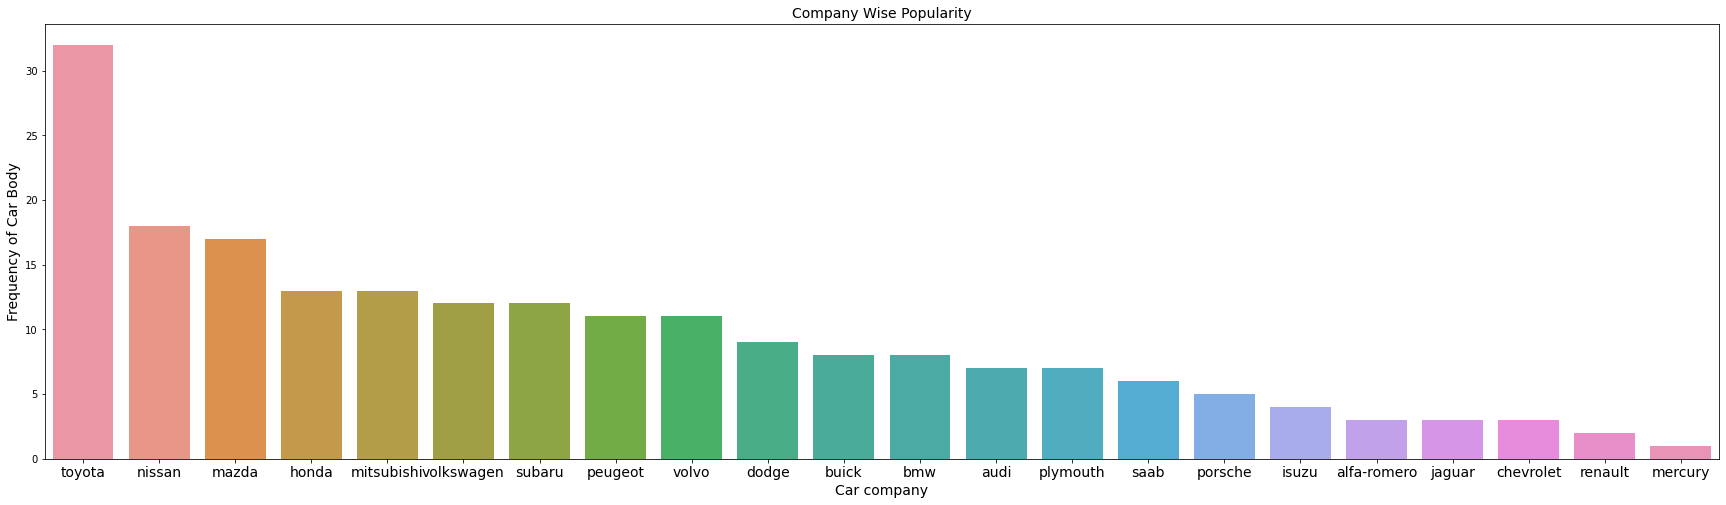

In [73]:
#plotting count of company names

plt.figure(figsize=(30, 8))
plt1=sns.countplot(x=carPrice['companyname'], data=carPrice, order= carPrice['companyname'].value_counts().index)
plt.title('Company Wise Popularity', size=14)
plt1.set_xlabel('Car company', fontsize=14)
plt1.set_ylabel('Frequency of Car Body', fontsize=14)
plt1.set_xticklabels(plt1.get_xticklabels(),rotation=360, size=14)
plt.show()

Insights from this countplot:

    a. toyoto seems to have maximum data and hence the most popular brand
    b. Mercury has the least data and hence the least popular brand 

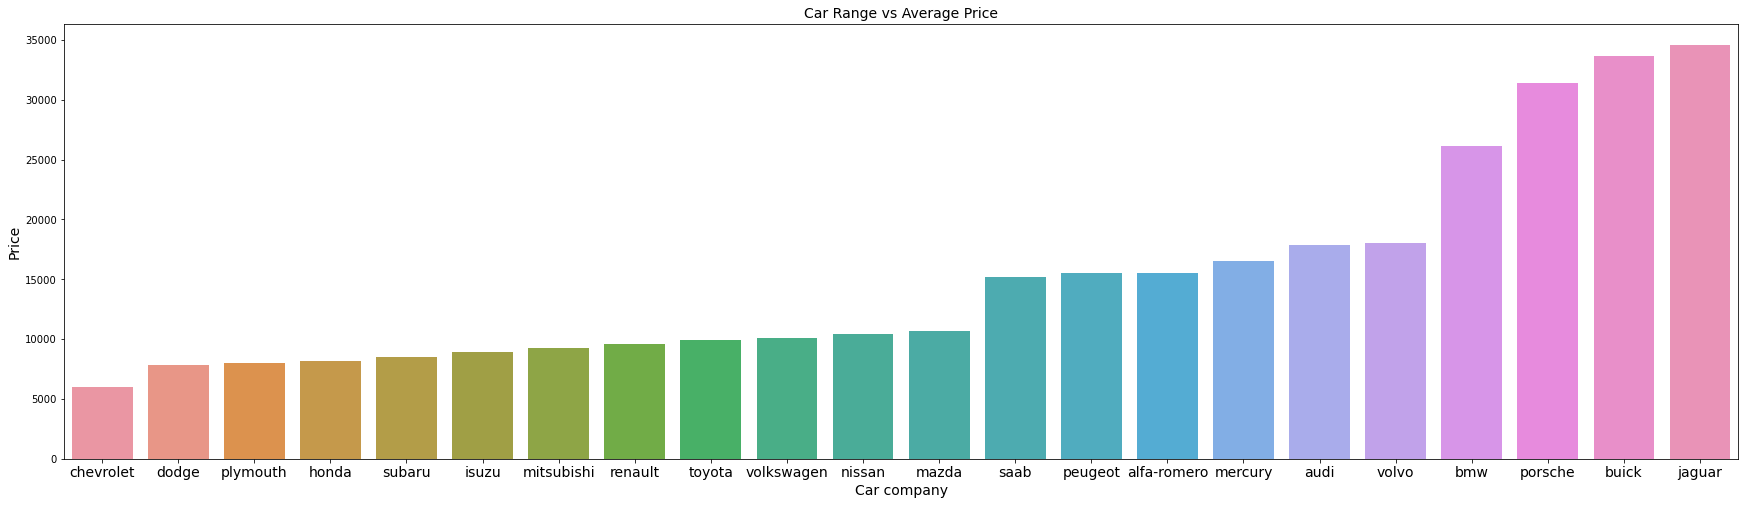

In [74]:
#plotting company wise average price of car


plt.figure(figsize=(30, 8))
#plt.figure()
df = pd.DataFrame(carPrice.groupby(['companyname'])['price'].mean().sort_values())
df=df.reset_index(drop=False)
plt1=sns.barplot(x="companyname", y="price", data=df)
plt1.set_title('Car Range vs Average Price', size=14)
plt1.set_xlabel('Car company', fontsize=14)
plt1.set_ylabel('Price', fontsize=14)
plt1.set_xticklabels(plt1.get_xticklabels(),rotation=360, size=14)
plt.show()

Insights from the plot:
    
    a. Chevrolet has the cheapest average price amongst all companies.
    b. Jaguar has the highest average price.
    c. The avg price seems to be dependant on the company name and this is an indicator that we can use this variable in our model because it shows correlation with car price

In [75]:
#Binning the Car Companies based on avg prices of each Company.

def replace_values(a,b):
    carPrice['companyname'].replace(a,b,inplace=True)

replace_values('chevrolet','Low_End')
replace_values('dodge','Low_End')
replace_values('plymouth','Low_End')
replace_values('honda','Low_End')
replace_values('subaru','Low_End')
replace_values('isuzu','Low_End')
replace_values('mitsubishi','Budget')
replace_values('renault','Budget')
replace_values('toyota','Budget')
replace_values('volkswagen','Budget')
replace_values('nissan','Budget')
replace_values('mazda','Budget')
replace_values('saab','Medium')
replace_values('peugeot','Medium')
replace_values('alfa-romero','Medium')
replace_values('mercury','Medium')
replace_values('audi','Medium')
replace_values('volvo','Medium')
replace_values('bmw','High_End')
replace_values('porsche','High_End')
replace_values('buick','High_End')
replace_values('jaguar','High_End')

carPrice.rename(columns = {'companyname':'segment'}, inplace = True)
carPrice.head()

,car_ID,symboling,segment,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,Medium,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,Medium,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,Medium,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,Medium,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,Medium,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


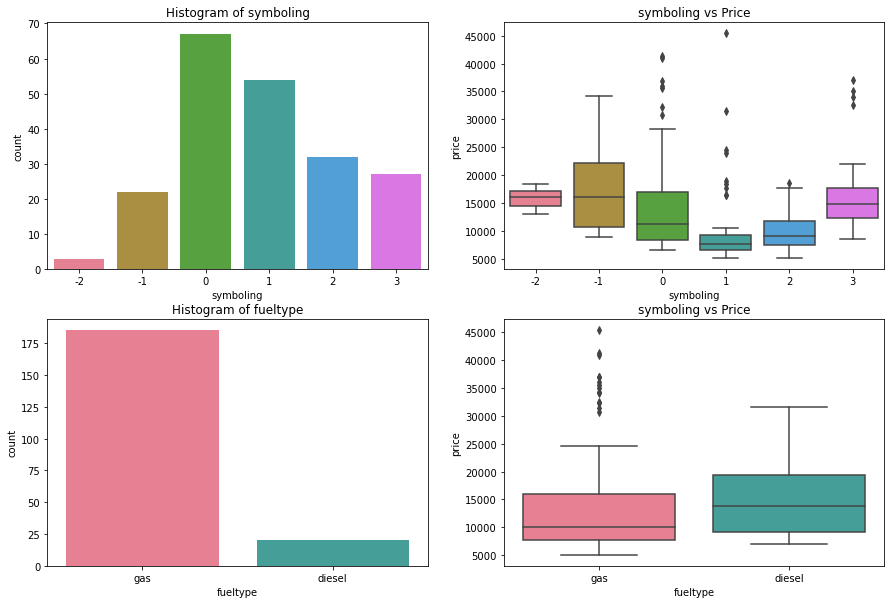

In [76]:
## FUNCTION TO PLOT CHARTS

def plot_charts(var1, var2):
    plt.figure(figsize=(15, 10))   
    plt.subplot(2,2,1)
    plt.title('Histogram of '+ var1)
    sns.countplot(carPrice[var1], palette=("husl"))
    plt1.set(xlabel = '%var1', ylabel='Frequency of'+ '%s'%var1)
    
    plt.subplot(2,2,2)
    plt.title(var1+' vs Price')
    sns.boxplot(x=carPrice[var1], y=carPrice.price, palette=("husl"))
    
    plt.subplot(2,2,3)
    plt.title('Histogram of '+ var2)
    sns.countplot(carPrice[var2], palette=("husl"))
    plt1.set(xlabel = '%var2', ylabel='Frequency of'+ '%s'%var2)
    
    plt.subplot(2,2,4)
    plt.title(var1+' vs Price')
    sns.boxplot(x=carPrice[var2], y=carPrice.price, palette=("husl"))
    
    plt.show()  
plot_charts('symboling', 'fueltype')

Insights from the plot:
    
    a. Most common value for symboling is 0 and 1. The box plot shows us that symboing 1 has the least median price, followed by 0 and 2. symboling values of -1 and -2 have highest median car price.
       Symboling could be a good predictor variables because we can see a relation in the value of symboling and the price of car.

    b. More number of cars have fuel type Gas than diesel.

    c. Diesel cars have higher median price than gas, although we can see some outliers in the gas boxplot.

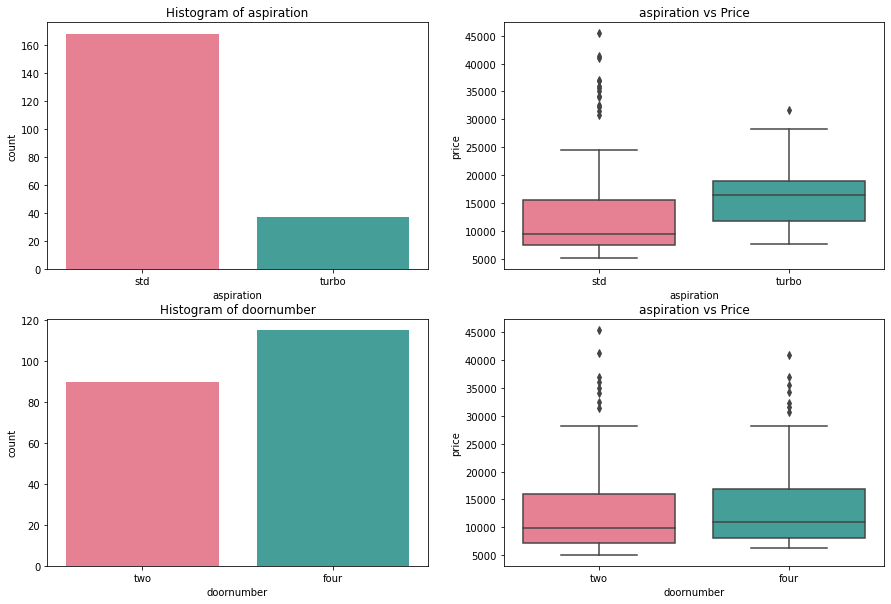

In [77]:
plot_charts('aspiration', 'doornumber')

Insights from the plot:
    
    a. cars with turbo has greater median price . And most of the cars has std aspiration.
    b. door number has no correlation with the car price

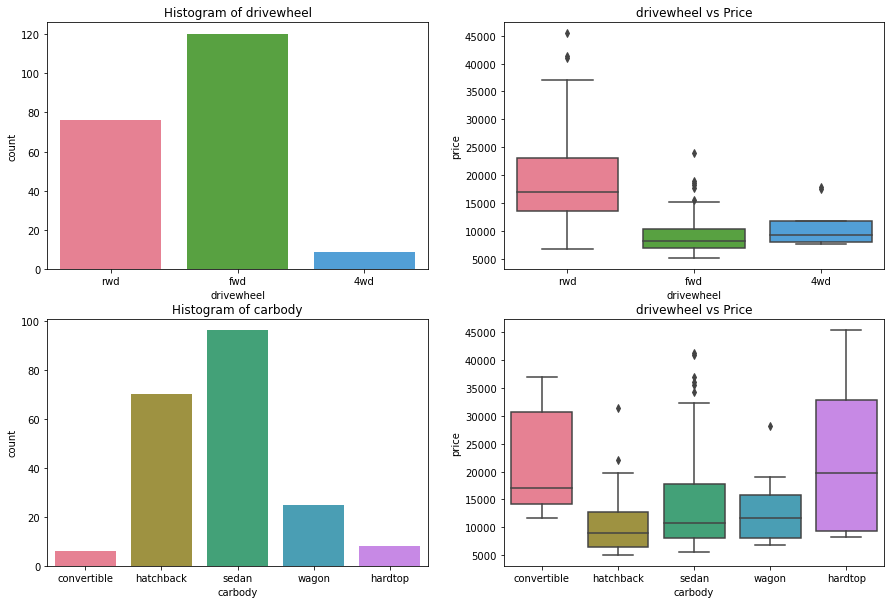

In [78]:
plot_charts('drivewheel', 'carbody')

Insights from the plot:
    
    a. most cars are with fwd(forward wheel drive ), 2nd most is the rwd(reverse wheel drive) and the least is the 4wd(4 wheel drive)
    b. Sedan carbody is the most popular followed by hachback.
    c. Car type Convertible and Hardtop has the maximum median price.

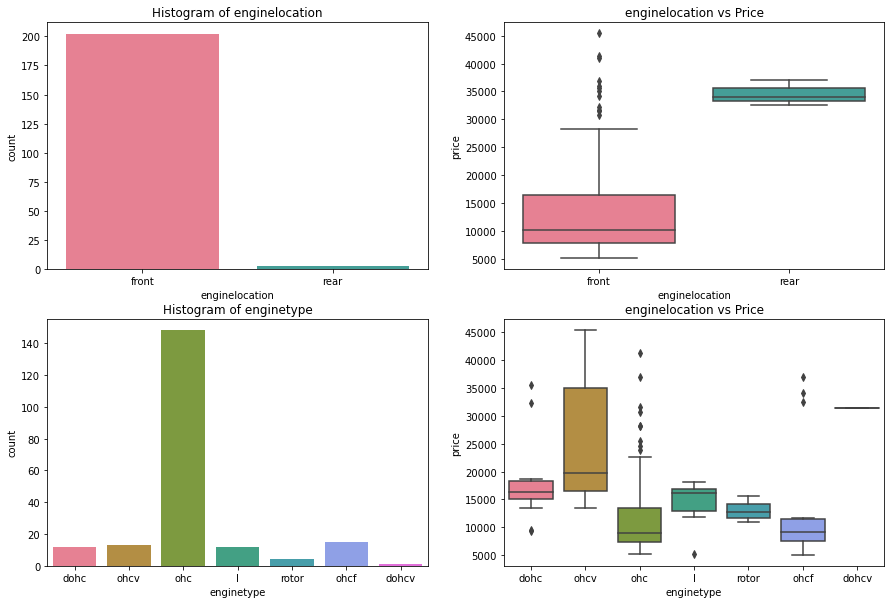

In [79]:
plot_charts('enginelocation', 'enginetype')

Insights from the plot:
    
    a. enginelocation front has the most popularity  and higher median price
    b. enginetype ohc has the maximum popularity followed by ohcf.
    c. ofcv enginetype has the maximum median price.

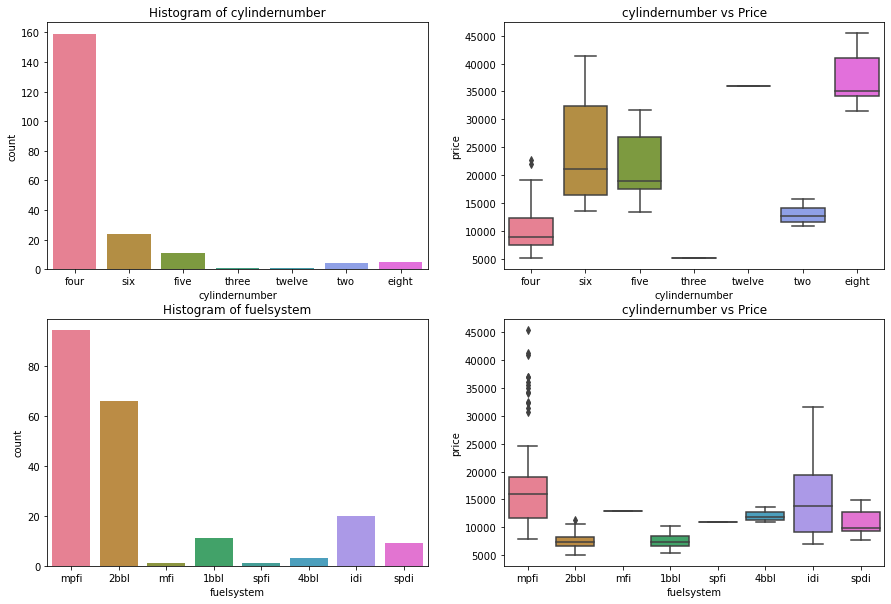

In [80]:
plot_charts('cylindernumber', 'fuelsystem')

Insights from the plot:
    
    a. four cylinders is the most common number, followed by six. Cars with four cylinder have the 2nd lowest median value after 3 (very few entries again).

    b. mpfi is the most occuring fuelsystem. It has the highest median value and also contains outliers which is seen in the boxplot

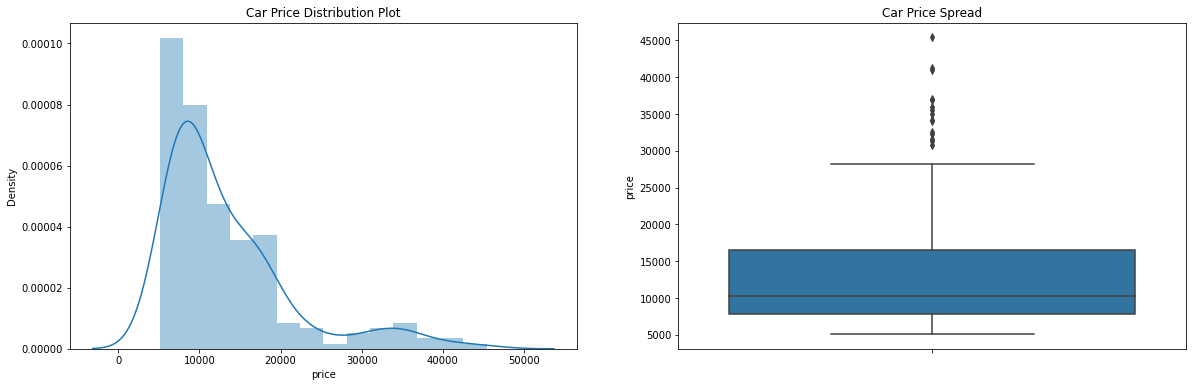

In [81]:
#checking distribution and spread of car price

plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(carPrice['price'])

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=carPrice['price'])

plt.show()

Insights from the boxplot:
    
    a. The plot is right-skewed, maximum cars price are below (15k)
    b. There is a significant difference between the mean and the median of the price distribution.
    c. There is a high variance in the car prices, data points are far from the mean.

In [82]:
# checking numeric columns

carPrice.select_dtypes(include=['float64','int64']).columns

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

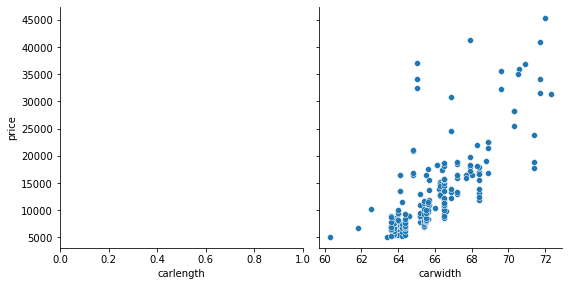

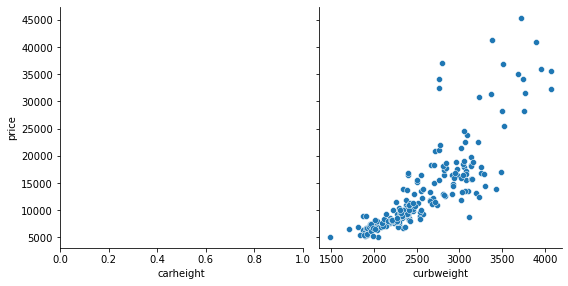

In [83]:
#function to plot scatter plot numeric variables with price

def pp(x,y):
    sns.pairplot(carPrice, x_vars=[x,y], y_vars='price',height=4, aspect=1, kind='scatter')
    plt.show()

pp('carlength', 'carwidth')
pp('carheight', 'curbweight')

Except Car Height and car lenght , all variables show a positive correlation with respect to price.

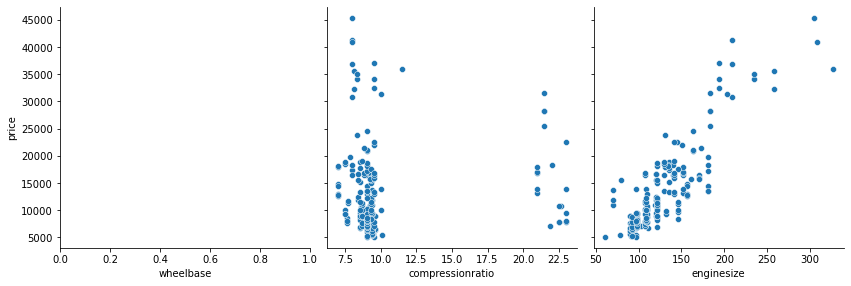

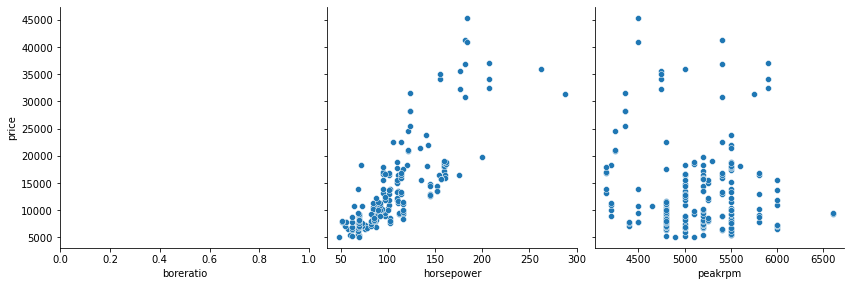

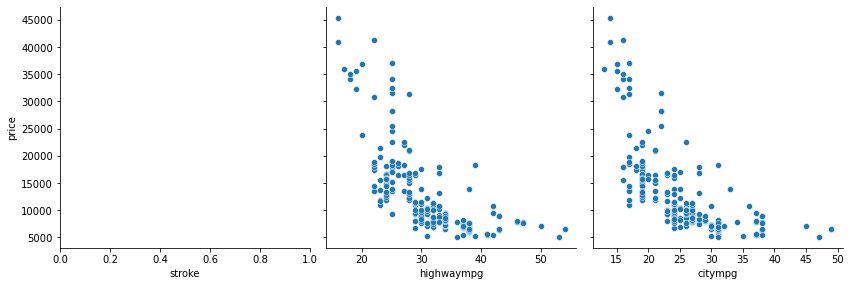

In [84]:
#function to plot scatter plot numeric variables with price

def pp(x,y,z):
    sns.pairplot(carPrice, x_vars=[x,y,z], y_vars='price',height=4, aspect=1, kind='scatter')
    plt.show()

pp('wheelbase', 'compressionratio', 'enginesize')
pp('boreratio', 'horsepower', 'peakrpm')
pp('stroke', 'highwaympg', 'citympg')

In [85]:
Compression Ratio and Peakrpm show no obvious correlation b/w them and car price.
Boreratio ,wheelbase and stroke shows no correlation with price.
Citympg and highwaympg are negatively correlated to the price.

SyntaxError: invalid syntax (<ipython-input-85-4e459ff37870>, line 1)

In [ ]:
#converting cylinder number to numeric and replacing values

def replace_values(a,b):
    carPrice.cylindernumber.replace(a,b,inplace=True)

replace_values('four','4')
replace_values('six','6')
replace_values('five','5')
replace_values('three','3')
replace_values('twelve','12')
replace_values('two','2')
replace_values('eight','8')

carPrice.cylindernumber=carPrice.cylindernumber.astype('int')

In [86]:
carPrice.symboling.unique()

array([ 3,  1,  2,  0, -1, -2])

In [87]:
#converting symboling to categorical because the numeric values imply weight

def replace_values(a,b):
    carPrice.symboling.replace(a,b,inplace=True)

replace_values(3,'Very_Risky')
replace_values(2,'Moderately_Risky')
replace_values(1,'Neutral')
replace_values(0,'Safe')
replace_values(-1,'Moderately_Safe')
replace_values(-2,'Very_Safe')

In [88]:
# Converting variables with 2 values to 1 and 0

carPrice['fueltype'] = carPrice['fueltype'].map({'gas': 1, 'diesel': 0})
carPrice['aspiration'] = carPrice['aspiration'].map({'std': 1, 'turbo': 0})
carPrice['doornumber'] = carPrice['doornumber'].map({'two': 1, 'four': 0})
carPrice['enginelocation'] = carPrice['enginelocation'].map({'front': 1, 'rear': 0})

In [89]:
carPrice.head()

,car_ID,symboling,segment,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,Very_Risky,Medium,1,1,1,convertible,rwd,1,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,Very_Risky,Medium,1,1,1,convertible,rwd,1,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,Neutral,Medium,1,1,1,hatchback,rwd,1,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,Moderately_Risky,Medium,1,1,0,sedan,fwd,1,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,Moderately_Risky,Medium,1,1,0,sedan,4wd,1,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [90]:
#dropping card_Id because it has all unique values and makes no sense

carPrice.drop(['car_ID'], axis =1, inplace = True)

In [91]:
#numeric variables

num_vars=carPrice.select_dtypes(include=['float64','int64']).columns

<AxesSubplot:>

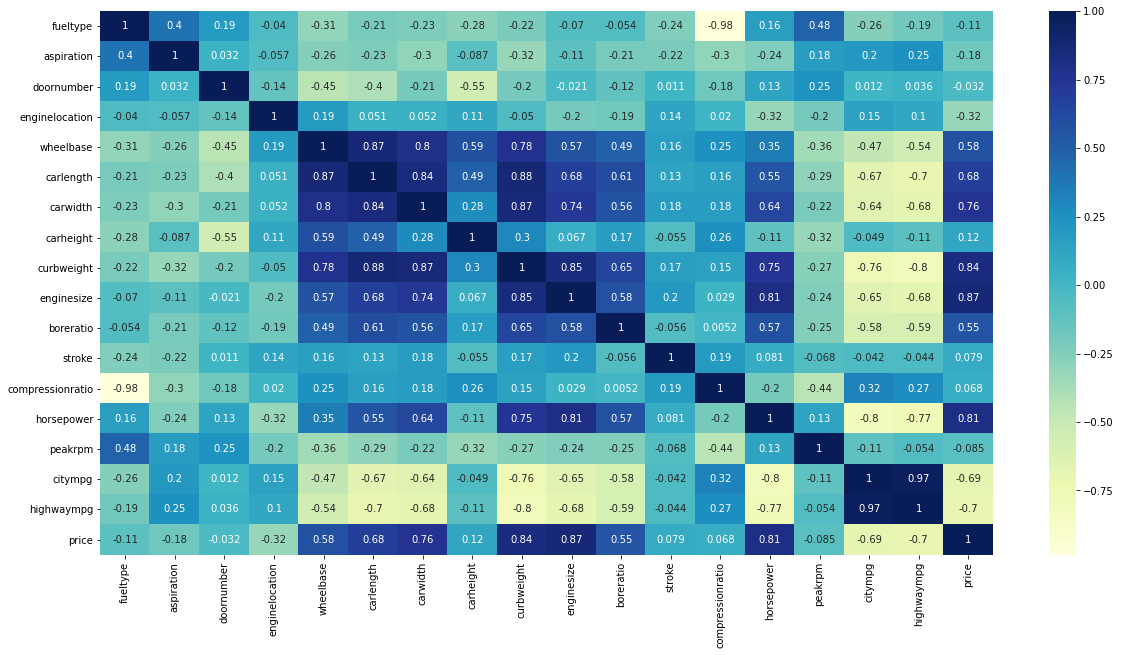

In [92]:
# plotting heatmap to check correlation amongst variables

plt.figure(figsize = (20,10))  
sns.heatmap(carPrice[num_vars].corr(),cmap="YlGnBu",annot = True)

In [93]:
#dropping variables which are highly correlated to other variables

carPrice.drop(['compressionratio','carwidth','curbweight','wheelbase','citympg'], axis =1, inplace = True)

In [94]:
carPrice.head()

,symboling,segment,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carlength,carheight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,horsepower,peakrpm,highwaympg,price
0,Very_Risky,Medium,1,1,1,convertible,rwd,1,168.8,48.8,dohc,four,130,mpfi,3.47,2.68,111,5000,27,13495.0
1,Very_Risky,Medium,1,1,1,convertible,rwd,1,168.8,48.8,dohc,four,130,mpfi,3.47,2.68,111,5000,27,16500.0
2,Neutral,Medium,1,1,1,hatchback,rwd,1,171.2,52.4,ohcv,six,152,mpfi,2.68,3.47,154,5000,26,16500.0
3,Moderately_Risky,Medium,1,1,0,sedan,fwd,1,176.6,54.3,ohc,four,109,mpfi,3.19,3.40,102,5500,30,13950.0
4,Moderately_Risky,Medium,1,1,0,sedan,4wd,1,176.6,54.3,ohc,five,136,mpfi,3.19,3.40,115,5500,22,17450.0


In [95]:
#getting dummies for categorical variables

df = pd.get_dummies(carPrice)
df.head()

,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,enginesize,boreratio,stroke,horsepower,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,1,1,1,168.8,48.8,130,3.47,2.68,111,...,0,0,0,0,0,0,0,1,0,0
1,1,1,1,1,168.8,48.8,130,3.47,2.68,111,...,0,0,0,0,0,0,0,1,0,0
2,1,1,1,1,171.2,52.4,152,2.68,3.47,154,...,0,0,0,0,0,0,0,1,0,0
3,1,1,0,1,176.6,54.3,109,3.19,3.40,102,...,0,0,0,0,0,0,0,1,0,0
4,1,1,0,1,176.6,54.3,136,3.19,3.40,115,...,0,0,0,0,0,0,0,1,0,0


In [96]:
#checking column names for dummy variables

df.columns

Index(['fueltype', 'aspiration', 'doornumber', 'enginelocation', 'carlength',
       'carheight', 'enginesize', 'boreratio', 'stroke', 'horsepower',
       'peakrpm', 'highwaympg', 'price', 'symboling_Moderately_Risky',
       'symboling_Moderately_Safe', 'symboling_Neutral', 'symboling_Safe',
       'symboling_Very_Risky', 'symboling_Very_Safe', 'segment_Budget',
       'segment_High_End', 'segment_Low_End', 'segment_Medium',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_eight', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two', 'fuelsystem_1bbl',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem

# Now Dividing the Dataset into train and test


In [97]:
df.head()

,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,enginesize,boreratio,stroke,horsepower,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,1,1,1,168.8,48.8,130,3.47,2.68,111,...,0,0,0,0,0,0,0,1,0,0
1,1,1,1,1,168.8,48.8,130,3.47,2.68,111,...,0,0,0,0,0,0,0,1,0,0
2,1,1,1,1,171.2,52.4,152,2.68,3.47,154,...,0,0,0,0,0,0,0,1,0,0
3,1,1,0,1,176.6,54.3,109,3.19,3.40,102,...,0,0,0,0,0,0,0,1,0,0
4,1,1,0,1,176.6,54.3,136,3.19,3.40,115,...,0,0,0,0,0,0,0,1,0,0


In [98]:
# importing necessary libraries and functions

from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

train, test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [99]:
train.head()

,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,enginesize,boreratio,stroke,horsepower,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
122,1,1,0,1,167.3,50.8,98,2.97,3.23,68,...,0,0,0,1,0,0,0,0,0,0
125,1,1,1,1,168.9,50.2,151,3.94,3.11,143,...,0,0,0,0,0,0,0,1,0,0
166,1,1,1,1,168.7,52.6,98,3.24,3.08,112,...,0,0,0,0,0,0,0,1,0,0
1,1,1,1,1,168.8,48.8,130,3.47,2.68,111,...,0,0,0,0,0,0,0,1,0,0
199,1,0,0,1,188.8,57.5,130,3.62,3.15,162,...,0,0,0,0,0,0,0,1,0,0


Scaling numerical variable

In [100]:
test.head()

,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,enginesize,boreratio,stroke,horsepower,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
160,1,1,0,1,166.3,53.0,98,3.19,3.03,70,...,0,0,0,1,0,0,0,0,0,0
186,1,1,0,1,171.7,55.7,109,3.19,3.40,85,...,0,0,0,0,0,0,0,1,0,0
59,1,1,1,1,177.8,53.7,122,3.39,3.39,84,...,0,0,0,1,0,0,0,0,0,0
165,1,1,1,1,168.7,52.6,98,3.24,3.08,112,...,0,0,0,0,0,0,0,1,0,0
140,1,1,1,1,157.3,55.7,108,3.62,2.64,73,...,0,0,0,1,0,0,0,0,0,0


In [101]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [102]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['fueltype', 'aspiration', 'doornumber', 'enginelocation', 'enginesize','horsepower', 
            'peakrpm', 'highwaympg', 'carlength', 'carheight', 'boreratio', 'stroke', 'price']


train[num_vars] = scaler.fit_transform(train[num_vars])

train.head()

,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,enginesize,boreratio,stroke,horsepower,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
122,1.0,1.0,0.0,1.0,0.426016,0.265487,0.139623,0.230159,0.525253,0.083333,...,0,0,0,1,0,0,0,0,0,0
125,1.0,1.0,1.0,1.0,0.452033,0.212389,0.339623,1.000000,0.464646,0.395833,...,0,0,0,0,0,0,0,1,0,0
166,1.0,1.0,1.0,1.0,0.448780,0.424779,0.139623,0.444444,0.449495,0.266667,...,0,0,0,0,0,0,0,1,0,0
1,1.0,1.0,1.0,1.0,0.450407,0.088496,0.260377,0.626984,0.247475,0.262500,...,0,0,0,0,0,0,0,1,0,0
199,1.0,0.0,0.0,1.0,0.775610,0.858407,0.260377,0.746032,0.484848,0.475000,...,0,0,0,0,0,0,0,1,0,0


In [103]:
test.head()

,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,enginesize,boreratio,stroke,horsepower,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
160,1,1,0,1,166.3,53.0,98,3.19,3.03,70,...,0,0,0,1,0,0,0,0,0,0
186,1,1,0,1,171.7,55.7,109,3.19,3.40,85,...,0,0,0,0,0,0,0,1,0,0
59,1,1,1,1,177.8,53.7,122,3.39,3.39,84,...,0,0,0,1,0,0,0,0,0,0
165,1,1,1,1,168.7,52.6,98,3.24,3.08,112,...,0,0,0,0,0,0,0,1,0,0
140,1,1,1,1,157.3,55.7,108,3.62,2.64,73,...,0,0,0,1,0,0,0,0,0,0


In [104]:
test.columns

Index(['fueltype', 'aspiration', 'doornumber', 'enginelocation', 'carlength',
       'carheight', 'enginesize', 'boreratio', 'stroke', 'horsepower',
       'peakrpm', 'highwaympg', 'price', 'symboling_Moderately_Risky',
       'symboling_Moderately_Safe', 'symboling_Neutral', 'symboling_Safe',
       'symboling_Very_Risky', 'symboling_Very_Safe', 'segment_Budget',
       'segment_High_End', 'segment_Low_End', 'segment_Medium',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_eight', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two', 'fuelsystem_1bbl',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem

In [105]:
train.columns

Index(['fueltype', 'aspiration', 'doornumber', 'enginelocation', 'carlength',
       'carheight', 'enginesize', 'boreratio', 'stroke', 'horsepower',
       'peakrpm', 'highwaympg', 'price', 'symboling_Moderately_Risky',
       'symboling_Moderately_Safe', 'symboling_Neutral', 'symboling_Safe',
       'symboling_Very_Risky', 'symboling_Very_Safe', 'segment_Budget',
       'segment_High_End', 'segment_Low_End', 'segment_Medium',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_eight', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two', 'fuelsystem_1bbl',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem

# Dividing into X and Y sets for the Model Building

In [106]:
#dividing into x and y sets where y has the variable we have to predict

y_train = train.pop('price')
X_train = train

# # Importing RFE and LinearRegression

In [107]:

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [108]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [109]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', True, 1),
 ('aspiration', False, 13),
 ('doornumber', False, 33),
 ('enginelocation', False, 19),
 ('carlength', True, 1),
 ('carheight', False, 30),
 ('enginesize', True, 1),
 ('boreratio', False, 7),
 ('stroke', True, 1),
 ('horsepower', True, 1),
 ('peakrpm', True, 1),
 ('highwaympg', False, 12),
 ('symboling_Moderately_Risky', False, 25),
 ('symboling_Moderately_Safe', False, 22),
 ('symboling_Neutral', False, 24),
 ('symboling_Safe', False, 23),
 ('symboling_Very_Risky', False, 41),
 ('symboling_Very_Safe', False, 3),
 ('segment_Budget', False, 5),
 ('segment_High_End', True, 1),
 ('segment_Low_End', False, 6),
 ('segment_Medium', False, 21),
 ('carbody_convertible', False, 10),
 ('carbody_hardtop', False, 27),
 ('carbody_hatchback', False, 29),
 ('carbody_sedan', False, 28),
 ('carbody_wagon', False, 26),
 ('drivewheel_4wd', False, 35),
 ('drivewheel_fwd', False, 20),
 ('drivewheel_rwd', False, 34),
 ('enginetype_dohc', False, 16),
 ('enginetype_dohcv', False, 15),


In [110]:
#checking RFE columns
col = X_train.columns[rfe.support_]
col

Index(['fueltype', 'carlength', 'enginesize', 'stroke', 'horsepower',
       'peakrpm', 'segment_High_End', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two'],
      dtype='object')

# Building model using statsmodel, for the detailed statistics

In [111]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]


In [112]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
X_train_rfe

,const,fueltype,carlength,enginesize,stroke,horsepower,peakrpm,segment_High_End,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
122,1.0,1.0,0.426016,0.139623,0.525253,0.083333,0.551020,0,0,0,0
125,1.0,1.0,0.452033,0.339623,0.464646,0.395833,0.551020,1,0,0,0
166,1.0,1.0,0.448780,0.139623,0.449495,0.266667,1.000000,0,0,0,0
1,1.0,1.0,0.450407,0.260377,0.247475,0.262500,0.346939,0,0,0,0
199,1.0,1.0,0.775610,0.260377,0.484848,0.475000,0.387755,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
87,1.0,1.0,0.508943,0.184906,0.641414,0.283333,0.551020,0,0,0,0
103,1.0,1.0,0.707317,0.452830,0.545455,0.433333,0.428571,0,0,0,0
67,1.0,0.0,0.809756,0.460377,0.732323,0.312500,0.081633,1,0,0,0
24,1.0,1.0,0.263415,0.109434,0.525253,0.083333,0.551020,0,0,0,0


In [113]:
def checkVIF(X):
    vif = pd.DataFrame()
    vif['variable'] = X.columns    
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [114]:
# building MODEL #1

lm = sm.OLS(y_train,X_train_rfe).fit() # fitting the model
print(lm.summary()) # model summary

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     147.0
Date:                Sun, 17 Jan 2021   Prob (F-statistic):           1.82e-66
Time:                        14:54:07   Log-Likelihood:                 195.44
No. Observations:                 143   AIC:                            -368.9
Df Residuals:                     132   BIC:                            -336.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.02

In [115]:
#dropping constant to calculate VIF because constant does not make sense for VIF. VIF is only calculated for independent variable

X_train_rfe.drop('const', axis = 1, inplace=True)


In [116]:
checkVIF(X_train_rfe)

,variable,VIF
2,enginesize,39.44
4,horsepower,15.48
1,carlength,14.61
3,stroke,12.50
5,peakrpm,10.34
0,fueltype,10.24
6,segment_High_End,2.45
8,cylindernumber_twelve,1.52
9,cylindernumber_two,1.42
7,cylindernumber_three,1.04


# dopping boreratio because it has the highest p-value(0.006) and also high VIF. 

In [117]:
X_train_new = X_train_rfe.drop(["stroke"], axis = 1)

In [118]:
#building MODEL #2 after dropping boreratio

X_train_new = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit() # fitting the model
print(lm.summary()) # model summary

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     157.4
Date:                Sun, 17 Jan 2021   Prob (F-statistic):           2.10e-66
Time:                        14:56:01   Log-Likelihood:                 192.50
No. Observations:                 143   AIC:                            -365.0
Df Residuals:                     133   BIC:                            -335.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.07

In [119]:
X_train_new.drop('const', axis=1, inplace=True) #dropping const

In [120]:
checkVIF(X_train_new)

,variable,VIF
2,enginesize,29.66
1,carlength,14.15
3,horsepower,12.42
0,fueltype,10.15
4,peakrpm,8.29
5,segment_High_End,2.31
8,cylindernumber_two,1.38
7,cylindernumber_twelve,1.36
6,cylindernumber_three,1.03


enginelocation has the highest p value(0.007), which also means least significance and high VIF , hence dropping enginelocation

In [ ]:
X_train_new.columns

In [121]:
X_train_new.drop(['cylindernumber_three'], axis=1, inplace=True)

In [122]:
#building MODEL #3 after dropping enginelocation

X_train_new = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit() # fitting the model
print(lm.summary()) # model summary

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     173.6
Date:                Sun, 17 Jan 2021   Prob (F-statistic):           7.93e-67
Time:                        14:57:09   Log-Likelihood:                 190.73
No. Observations:                 143   AIC:                            -363.5
Df Residuals:                     134   BIC:                            -336.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.06

In [123]:
X_train_new.drop('const', axis=1, inplace=True)# dropping constant 

In [124]:
checkVIF(X_train_new)

,variable,VIF
2,enginesize,29.65
1,carlength,14.07
3,horsepower,12.40
0,fueltype,10.00
4,peakrpm,8.29
5,segment_High_End,2.31
7,cylindernumber_two,1.38
6,cylindernumber_twelve,1.36


In [125]:
#dopping horsepower because it has the high VIF and exhibits multicollinearity. 
#VIF is higher which indicates it is highly correlated to engine size and can be dropped.

X_train_new.drop(["peakrpm"], axis=1, inplace=True)

In [126]:
#building MODEL #4 after dropping horsepower

X_train_new = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit() # fitting the model
print(lm.summary()) # model summary

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     191.6
Date:                Sun, 17 Jan 2021   Prob (F-statistic):           7.20e-67
Time:                        14:58:03   Log-Likelihood:                 187.97
No. Observations:                 143   AIC:                            -359.9
Df Residuals:                     135   BIC:                            -336.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.03

In [127]:
X_train_new.drop('const', axis=1, inplace=True)

In [128]:
checkVIF(X_train_new)

,variable,VIF
2,enginesize,27.87
1,carlength,13.87
3,horsepower,11.03
0,fueltype,4.38
4,segment_High_End,2.31
5,cylindernumber_twelve,1.36
6,cylindernumber_two,1.34


In [129]:
#dopping carlength because it has the high VIF and exhibits multicollinearity. 
#VIF is higher which indicated that it is highly correlated to engine size and can be dropped.

X_train_new.drop(["cylindernumber_twelve"], axis=1, inplace=True)

In [130]:
#building MODEL #5 after dropping carlength

X_train_new = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit() # fitting the model
print(lm.summary()) # model summary

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     217.3
Date:                Sun, 17 Jan 2021   Prob (F-statistic):           4.13e-67
Time:                        14:59:01   Log-Likelihood:                 185.66
No. Observations:                 143   AIC:                            -357.3
Df Residuals:                     136   BIC:                            -336.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0284      0

In [131]:
X_train_vif=X_train_new.drop('const', axis=1)

In [132]:
checkVIF(X_train_vif)

,variable,VIF
2,enginesize,23.70
1,carlength,11.88
3,horsepower,10.99
0,fueltype,4.37
4,segment_High_End,2.26
5,cylindernumber_two,1.31


In [133]:
X_train_new.drop(["enginesize"], axis=1, inplace=True)

In [134]:
#building MODEL #6 after dropping enginesize

X_train_new = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit() # fitting the model
print(lm.summary()) # model summary

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     251.5
Date:                Sun, 17 Jan 2021   Prob (F-statistic):           3.55e-67
Time:                        15:00:27   Log-Likelihood:                 182.84
No. Observations:                 143   AIC:                            -353.7
Df Residuals:                     137   BIC:                            -335.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0147      0

In [135]:
X_train_vif=X_train_new.drop('const', axis=1)

In [136]:
checkVIF(X_train_vif)

,variable,VIF
1,carlength,6.29
2,horsepower,5.67
0,fueltype,4.34
3,segment_High_End,1.72
4,cylindernumber_two,1.04


In [137]:
#calculating price on train set using the model built

y_train_price = lm.predict(X_train_new)

In [156]:
y_train_price

122    0.068577
125    0.539297
166    0.175169
1      0.173358
199    0.382193
         ...   
87     0.201439
103    0.339953
67     0.679743
24     0.022169
8      0.350245
Length: 143, dtype: float64

Text(0.5, 0, 'Errors')

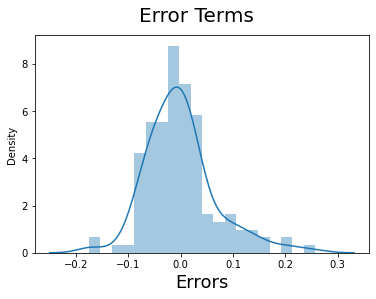

In [138]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

# It seems normally distributed around 0

Text(0, 0.5, 'y_train_price')

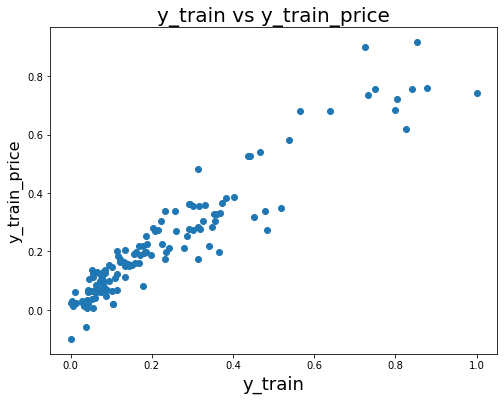

In [139]:
# Plotting y_train and y_train_price to understand the residuals.

plt.figure(figsize = (8,6))
plt.scatter(y_train,y_train_price)
plt.title('y_train vs y_train_price', fontsize=20)              # Plot heading 
plt.xlabel('y_train', fontsize=18)                          # X-label
plt.ylabel('y_train_price', fontsize=16)                          # Y-label

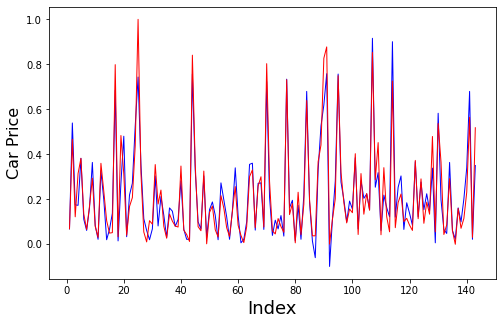

In [140]:
plt.figure(figsize = (8,5))
c = [i for i in range(1,144,1)]
d = [i for i in range(1,144,1)]
plt.plot(c, y_train_price, color="blue", linewidth=1, linestyle="-")     #Plotting Actual
plt.plot(d, y_train, color="red",  linewidth=1, linestyle="-")  #Plotting predicted
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=16)  
plt.show()

In [141]:
test.columns

Index(['fueltype', 'aspiration', 'doornumber', 'enginelocation', 'carlength',
       'carheight', 'enginesize', 'boreratio', 'stroke', 'horsepower',
       'peakrpm', 'highwaympg', 'price', 'symboling_Moderately_Risky',
       'symboling_Moderately_Safe', 'symboling_Neutral', 'symboling_Safe',
       'symboling_Very_Risky', 'symboling_Very_Safe', 'segment_Budget',
       'segment_High_End', 'segment_Low_End', 'segment_Medium',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_eight', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two', 'fuelsystem_1bbl',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem

In [142]:
# Applying the scaling on the test sets

num_vars = ['fueltype', 'aspiration', 'doornumber', 'enginelocation', 'enginesize','horsepower', 
            'peakrpm', 'highwaympg', 'carlength', 'carheight', 'boreratio', 'stroke', 'price']

test[num_vars] = scaler.transform(test[num_vars])

In [147]:
# Dividing into X_test and y_test

y_test = test.pop('price')
X_test = test

KeyError: 'price'

In [148]:
X_train_new.drop('const', axis=1, inplace=True)

KeyError: "['const'] not found in axis"

In [149]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [150]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [151]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8768904870223881

In [152]:
#RMSE score for test set

import numpy as np
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE : 0.08111711389423361


In [153]:
#RMSE score for train set

import numpy as np
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_train, y_train_price)))

RMSE : 0.06736871945728184


In [154]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8768904870223881

In [155]:
r2_score(y_train, y_train_price)

0.90174900185742

# Looking at the data it is clear that r2_square of test is .87 and train is 0.90 which are near values and also predict 
the better performance of the model. 

Also looking at the rmse it is clear that rmse for test is 0.08 and train is 0.06 which reflects less error in the model
.
Now I think we can show this model to the company and they can go ahead with the action items.